[1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1
 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0
 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0
 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1
 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0
 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1]
[[1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0

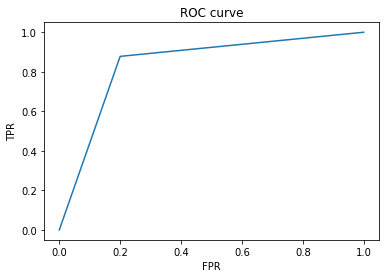

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



data = pd.read_csv('C:/Users/GAMING/OneDrive/Desktop/sel/sel/heart.csv')
x = data.iloc[:,0:-1].values #here,print all row and all col without the last
y = data.iloc[: , -1].values #here,print all row to the last col


from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')


#Here, you improve datasets and make all feature numerical
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])
le = LabelEncoder()
x[:,8] = le.fit_transform(x[:,8])
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])
le = LabelEncoder()
x[:,6] = le.fit_transform(x[:,6])
le = LabelEncoder()
x[:,10] = le.fit_transform(x[:,10])


#Here you split your data. part for training and part for testing both feature and target
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.5,random_state=None)


#Here, you improve your data from scaling
sc = MinMaxScaler(feature_range=(0,len(x))) # This mean Normalization   
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#you change the col place
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x = np.array(ct.fit_transform(x))
#print(x)


#you aplly algorithm on dataset after preprocessing
#kernel trick helps us to build a more accurate classifier
from sklearn.svm import SVC
Class = SVC(C=10.0, kernel='rbf', degree=3, gamma='scale', shrinking=True, probability=False,
            tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=2)
Class.fit(X_train,Y_train)
# print(the x_train Is = ,X_train,n,X_train.shape
#        ,nn,the y_train Is = ,Y_train,n,Y_train.shape)
Y_pred = Class.predict(X_test)
print(Y_pred)
#here, make matrics from 459 row and 2col.
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

#you using tool to measure efficincy from algorithm that apply it
from sklearn.metrics import confusion_matrix,recall_score
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print(100*recall_score(Y_test,Y_pred))


fpr1, tpr1, _ = roc_curve(Y_test, Y_pred)
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

